# LSN Esercitazione 12

## Esercizio 12.1

La richiesta di questo esercizio è testare le prestazioni di una rete neurale (sul database MNIST) al variare solo dell'ottimizzatore. In particolare, useremo lo statistic gradient descent, adam e RMSprop. Al variare di questi studieremo l'andamento di loss e accuracy.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from IPython.display import clear_output
from PIL import Image
import os

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # fontsize of the legend

Using TensorFlow backend.


In [ ]:
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

an example of a data point with label 4


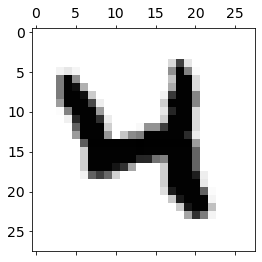

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [ ]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels);

In [ ]:
def create_DNN():
    model = Sequential([
        # dense all-to-all relu layers
        #keras.layers.Dense(512,input_shape=(img_rows*img_cols,), activation='relu'),
        keras.layers.Dense(400,input_shape=(img_rows*img_cols,), activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        # apply dropout with rate 0.5
        keras.layers.Dropout(0.5),
        # soft-max layer
        keras.layers.Dense(num_classes, activation='softmax')
    ])
    print('Model architecture created successfully!')  
    return model

def compile_model(opt):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['accuracy'])
    print('Model compiled successfully and ready to be trained!')
    return model

### Statistic Gradient Descent

In [ ]:
# training parameters
batch_size = 32
epochs = 15

# create the deep neural net
model_DNN = compile_model('sgd')

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Model architecture created successfully!
Model compiled successfully and ready to be trained!
Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7280 - accuracy: 0.7885 - val_loss: 0.3027 - val_accuracy: 0.9177
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3727 - accuracy: 0.8941 - val_loss: 0.2340 - val_accuracy: 0.9324
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3016 - accuracy: 0.9158 - val_loss: 0.1969 - val_accuracy: 0.9420
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2598 - accuracy: 0.9276 - val_loss: 0.1722 - val_accuracy: 0.9477
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2301 - accuracy: 0.9350 - val_loss: 0.1572 - val_accuracy: 0.9502
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2070 - accuracy: 0.9416 - val_loss: 0.1431 - val_accuracy: 0.9543
Epoch 7/15
1875/1875 [====================

Evalutate model:
313/313 [==============================] - 1s 2ms/step - loss: 0.0861 - accuracy: 0.9719

Test loss: 0.08611167967319489
Test accuracy: 0.9718999862670898


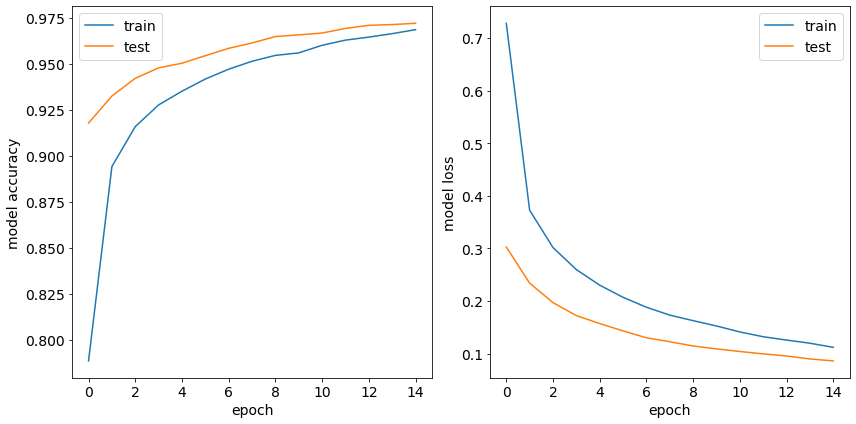

In [ ]:
def plot_results(y):
    plt.plot(history.history[y])
    plt.plot(history.history['val_' + y])
    plt.ylabel('model ' + y)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')

def plot_summary():
    # look into training history
    plt.subplots(figsize=(12,6))

    # plot accuracy and loss for train and train sets
    plt.subplot(1,2,1)
    plot_results('accuracy')
    plt.subplot(1,2,2)
    plot_results('loss')

    plt.tight_layout()
    plt.show()

# evaluate model
print('Evalutate model:')
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_summary()

### Adam

In [ ]:
# create the deep neural net
model_DNN = compile_model('adam')

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Model architecture created successfully!
Model compiled successfully and ready to be trained!
Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2832 - accuracy: 0.9172 - val_loss: 0.1060 - val_accuracy: 0.9684
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1202 - accuracy: 0.9659 - val_loss: 0.0911 - val_accuracy: 0.9712
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0887 - accuracy: 0.9739 - val_loss: 0.0765 - val_accuracy: 0.9792
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0680 - accuracy: 0.9796 - val_loss: 0.0841 - val_accuracy: 0.9778
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0570 - accuracy: 0.9827 - val_loss: 0.0751 - val_accuracy: 0.9800
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0464 - accuracy: 0.9862 - val_loss: 0.0846 - val_accuracy: 0.9777
Epoch 7/15
1875/1875 [====================

Evalutate model:
313/313 [==============================] - 1s 2ms/step - loss: 0.1052 - accuracy: 0.9823

Test loss: 0.10521292686462402
Test accuracy: 0.9822999835014343


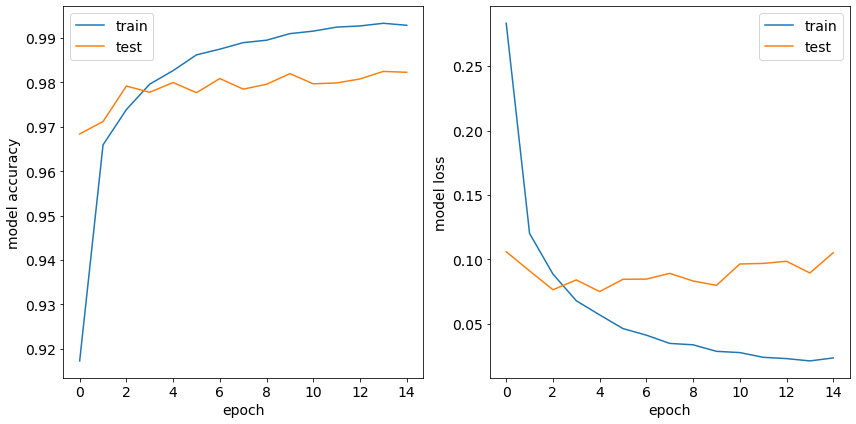

In [ ]:
# evaluate model
print('Evalutate model:')
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_summary()

###RMSprop

In [ ]:
# create the deep neural net
model_DNN = compile_model('rmsprop')

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Model architecture created successfully!
Model compiled successfully and ready to be trained!
Epoch 1/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2760 - accuracy: 0.9197 - val_loss: 0.1258 - val_accuracy: 0.9653
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1468 - accuracy: 0.9634 - val_loss: 0.1286 - val_accuracy: 0.9706
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1421 - accuracy: 0.9688 - val_loss: 0.1265 - val_accuracy: 0.9725
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1422 - accuracy: 0.9715 - val_loss: 0.1339 - val_accuracy: 0.9740
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1442 - accuracy: 0.9717 - val_loss: 0.1594 - val_accuracy: 0.9731
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1401 - accuracy: 0.9724 - val_loss: 0.1788 - val_accuracy: 0.9754
Epoch 7/15
1875/1875 [====================

Evalutate model:
313/313 [==============================] - 1s 2ms/step - loss: 0.2884 - accuracy: 0.9776

Test loss: 0.2884294390678406
Test accuracy: 0.9775999784469604


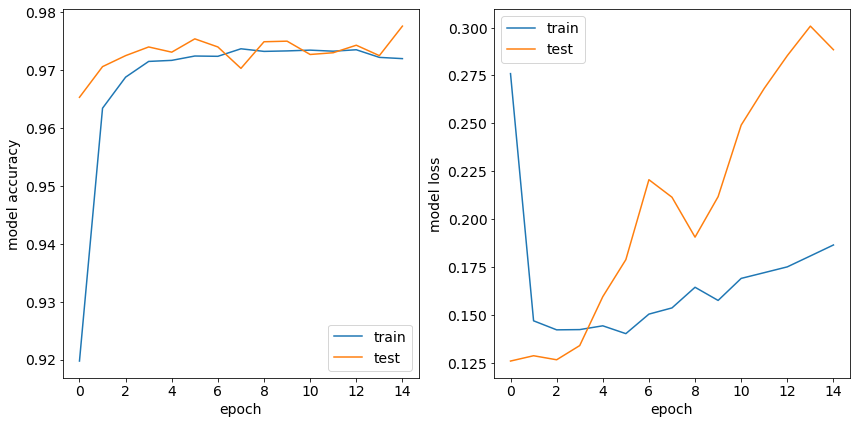

In [ ]:
# evaluate model
print('Evalutate model:')
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_summary()

Dopo aver prodotto i grafici di loss e accuracy per tutti e tre i casi (addestrando la rete per 15 epoche) siamo pronti a discuterli. Scegliendo **SGD** come ottimizzatore osserviamo che la loss descresce all'aumentare delle epoche sia per i dati di training che per quelli di validazione, mentre l'accuracy cresce. Una caratteristica importante del grafico che abbiamo citato è che la loss per il set di validazione è decrescente e questo significa che non stiamo ancora overfittando. Questo ci fa capire che potremmo ancora proseguire con le epoche durante le quali addestriamo la nostra rete e migliorare le performance. 

Se utilizziamo **ADAM** possiamo notare che i valori della loss sono più bassi per entrambi i set, ma che, all'aumentare delle epoche, la distanza tra la training loss e la test loss cresce, il che suggerisce che sta iniziando a configurarsi un overfitting.

Questo è ancora più evidente con **RMSprop**; mentre l'accuracy è alta e rimane tale al variare delle epoche, la loss ha un comportamento diverso: crolla all'inizio, ma in seguito vediamo un'impennata nel grafico della loss del set di validazione. Questo ci fa capire che sin dalla quinta epoca la nostra rete neurale sta overfittando il training set.

Possiamo quindi concludere che in questo caso SGD sembra essere la scelta più saggia per quanto riguarda l'ottimizzatore.

## Esercizio 12.2

In questo esercizio ci viene richiesto di implementare una rete neurale convoluzionale (CNN) e di utilizzarla per impare il dataset MNIST, come abbiamo fatto con la DNN dell'esercizio precedente. La CNN che costruiremo sarà composta da layer convoluzionali, layer di pooling e infine anche da layer completamente connessi. In particolare il layer di output sarà un layer completamente connesso formato da 10 unità, una per ogni cifra rappresentata in MNIST. Il neurone che riceverà l'attivazione maggiore indicherà che la cifra corrispondente è stata predetta come la più probabile.

In [ ]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [ ]:
def create_CNN():
    # instantiate model
    model = Sequential([
    # layer with 10 filters (dimensionality of output space)
    keras.layers.Conv2D(10, kernel_size=(5, 5), input_shape=input_shape, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(3, 3)),
    keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.5),
    # soft-max layer
    keras.layers.Dense(num_classes, activation='softmax')
    ])
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model

In [ ]:
# training parameters
batch_size = 32
epochs = 10

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.9985 - accuracy: 0.6675 - val_loss: 0.2498 - val_accuracy: 0.9273
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3197 - accuracy: 0.9045 - val_loss: 0.1440 - val_accuracy: 0.9558
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2309 - accuracy: 0.9306 - val_loss: 0.1057 - val_accuracy: 0.9658
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1882 - accuracy: 0.9443 - val_loss: 0.0869 - val_accuracy: 0.9701
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1640 - accuracy: 0.9512 - val_loss: 0.0786 - val_accuracy: 0.9736
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1478 - accuracy: 0.9561 - val_loss: 0.0685 - val_accuracy: 0.9753
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1361 - accuracy: 0.9599 - val_loss: 0.0671 -

Evalutate model:
313/313 [==============================] - 2s 6ms/step - loss: 0.0539 - accuracy: 0.9810

Test loss: 0.05385950952768326
Test accuracy: 0.9810000061988831


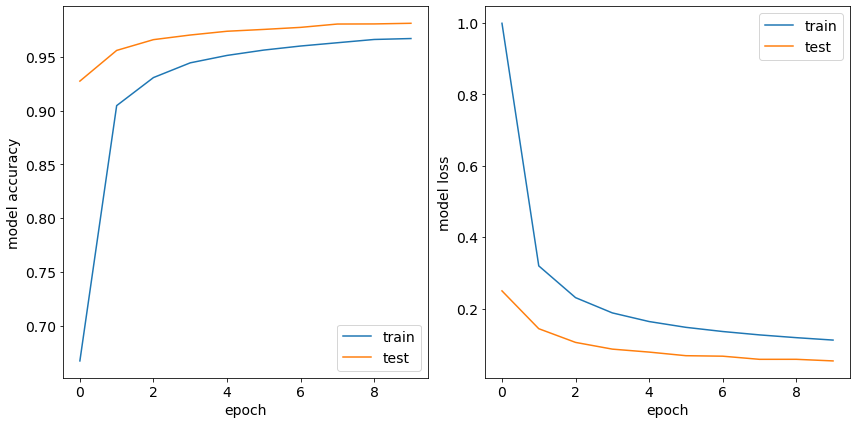

In [ ]:
# evaluate model
print('Evalutate model:')
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_summary()

## Esercizio 12.3

In questo esercizio testiamo le performance della CNN che abbiamo costruito su delle cifre scritte da noi utilizzando il programma GIMP. Dopo aver scritto le cifre da 0 a 9, le diamo in pasto alla nostra rete neurale ed osserviamo se riesce a riconoscerle.

Le performance della rete sono soddisfacenti, infatti riesce a riconoscere tutte le cifre.

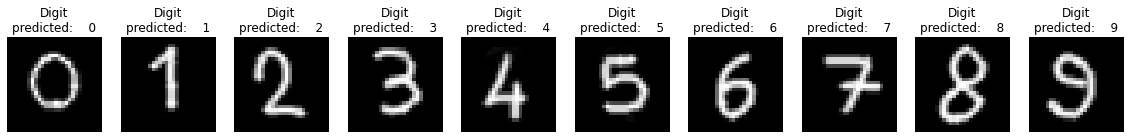

In [ ]:
plt.figure(figsize=(20, 3))  
for k in range(10):
    digit_filename = './My_MNIST/'+str(k)+'.png'
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255


    data = data.reshape(1,xdim,ydim,1)
    pred_0 = model_CNN.predict(data)

    data = data.reshape(xdim,ydim)

    plt.subplot(1,10,k+1)
    plt.imshow(data, cmap='gray')    
    plt.title("Digit\npredicted:    {}".format(np.argmax(pred_0)))
    plt.axis('off') 
plt.show()